#주제

---



#도메인 : 국내여행 
## - 전국 지역별 여행객의 수를 예측

*   여행객 수에 가장 큰 영향을 미치는 요인이 무엇일까?


*   이를 통해서 여행객 수를 끌어모으기 위해 지역은 어떤 방향으로 개선책을 강구해야하는지 알아보자



*   가설
>지역의 랜드마크 검색건수가 여행객 수를 예측하는 가장 큰 요인일 것이다. 
그러므로 각 지역은 여행객 수를 끌어모으기 위해 지역만의 특색있는 랜드마크를 만들어나가는 방향의 개선책을 강구해야한다



*   이유
>  여행객들은 지역의 랜드마크(ex 해수욕장,놀이공원 등)를 생각하며 여행계획을 세우는 경우가 많다. 그렇기에 여행객 수에 가장 많은 영향을 주는 것은 랜드마크 검색건수 특성이라고 추측해본다.









---


# 1.데이터 전처리 


---



###데이터 가져오기

In [ ]:
import pandas as pd

from google.colab import files
uploded = files.upload()

-15개의 데이터셋 사용(코로나펜데믹 이전 가장 많은 여행객이 있었던 해인 2019년 기준)

In [1929]:
df_target = pd.read_csv('광역별 방문자 수.csv' ,encoding='cp949')
#2019년 한 해 여행객 수(코로나 이전 가장 많은 여행객이 있었던 해)

df1 = pd.read_csv('2019년 음식점,쇼핑점,관광명소 수.csv') 
#2020.02월 기준

#한글이 포함된 csv 파일은 한글전용인코딩방식인 cp949를 파라미터로 지정해주면 불러올 수 있다.
df2 = pd.read_csv('지역별 축제 수.csv' ,encoding='cp949')

df3 = pd.read_csv('지역별 검색건수.csv' ,encoding='cp949')
#2019년 한 해 지역별 검색건수

df4 = pd.read_csv('숙박업.csv' ,encoding='cp949')
#2019년 기준 존재하는 숙박업 정리

df5 = pd.read_csv('레저 데이터셋.csv' ,encoding='cp949')
#2019년 기준 레저

df6_1 = pd.read_excel('(랜드마크)기타관광,교통(공항,케이블카 등등) 검색건수.xlsx')
df6_2 = pd.read_excel('(랜드마크)호텔,숙박 검색건수.xlsx')
df6_3 = pd.read_excel('(랜드마크)음식점,카페 검색건수.xlsx')
df6_4 = pd.read_excel('(랜드마크)쇼핑,시장 검색건수.xlsx')
df6_5 = pd.read_excel('(랜드마크)레제관광(골프장 등) 검색건수.xlsx')
df6_6 = pd.read_excel('(랜드마크)문화관광(에버렌드 등) 검색건수.xlsx')
df6_7 = pd.read_excel('(랜드마크)체험관광(테마파크 등) 검색건수.xlsx')
df6_8 = pd.read_excel('(랜드마크)역사관광(첨성대 등) 검색건수.xlsx')
df6_9 = pd.read_excel('(랜드마크)자연관광(해수욕장 등) 검색건수.xlsx')
#2019년 한해 지역별 랜드마크 검색건수

pd.options.display.float_format = '{:.0f}'.format

### 1.관광명소/음식점/쇼핑점 컬럼 추가

In [1930]:
df1.head()

,sido_nm,sgg_nm,hadm_cd,atrctn_cnt,rstrt_cnt,shopng_cnt,residnt_cnt_sum,FILE_NAME,base_ymd
0,강원도,강릉시,42150,308,4685,460,162905,KC_619_DMSTC_TRV_CNSMP_STATN_BIZAEA_MAP_2019,20200214
1,강원도,고성군,42820,105,795,117,18628,KC_619_DMSTC_TRV_CNSMP_STATN_BIZAEA_MAP_2019,20200214
2,강원도,동해시,42170,85,1929,247,68772,KC_619_DMSTC_TRV_CNSMP_STATN_BIZAEA_MAP_2019,20200214
3,강원도,삼척시,42230,135,1597,209,45409,KC_619_DMSTC_TRV_CNSMP_STATN_BIZAEA_MAP_2019,20200214
4,강원도,속초시,42210,79,2594,210,63203,KC_619_DMSTC_TRV_CNSMP_STATN_BIZAEA_MAP_2019,20200214


- sido_nm	시도명칭 	
-	sgg_nm	시군구명칭
- hadm_cd	행정동코드 
- atrctn_cnt:관광명소 수
- rstrt_cnt: 음식점 수
- shopng_cnt: 쇼핑점 수
- residnt_cnt_sum	인구 수
- FILE_NAME	파일명
- BASE_YMD	기준일

In [1931]:
#결측치 파악
df1[df1['sido_nm'].isnull() | df1['sgg_nm'].isnull() | df1['hadm_cd'].isnull() | df1['atrctn_cnt'].isnull() | df1['rstrt_cnt'].isnull() | df1['shopng_cnt'].isnull()]

,sido_nm,sgg_nm,hadm_cd,atrctn_cnt,rstrt_cnt,shopng_cnt,residnt_cnt_sum,FILE_NAME,base_ymd
165,세종특별자치시,NaN,36110,152,3886,301,229563,KC_619_DMSTC_TRV_CNSMP_STATN_BIZAEA_MAP_2019,20200214


In [1932]:
#결측치에 적절한 값 추가
df1.fillna('세종특별자치시',inplace=True)

In [1933]:
#필요한 컬럼만 추출, 한글로 컬럼명 변경
df1.drop(['hadm_cd','FILE_NAME','base_ymd','residnt_cnt_sum'], axis=1, inplace = True)
df1.rename(columns = {'sido_nm':'행정구역','sgg_nm':'지역명',
                      'atrctn_cnt':'관광명소', 'rstrt_cnt':'음식점','shopng_cnt':'쇼핑점'},inplace=True)

In [1934]:
df1.head()

,행정구역,지역명,관광명소,음식점,쇼핑점
0,강원도,강릉시,308,4685,460
1,강원도,고성군,105,795,117
2,강원도,동해시,85,1929,247
3,강원도,삼척시,135,1597,209
4,강원도,속초시,79,2594,210


### 2.축제 컬럼 추가

In [1935]:
#2019년 축제 추출
df2 = df2[(df2['FSTVL_START_DATE']>=20190101) & (df2['FSTVL_START_DATE']<=20191231)]
df2.head()

,FSTVL_NM,OPAR,FSTVL_START_DATE,FSTVL_END_DATE,MNNST,P_KOR_STN_NM,P_STN_C_DST,ARV_STN_CD,ARV_ABRD_PRNB
40,2019 계룡산벚꽃축제,계룡산 동학사 일원,20190405,20190414,계룡산축제추진위원회,계룡,10,3900199,922
41,2019 계룡산산신제,계룡면 양화리 신원사일원,20190420,20190421,계룡산산신제보존회,공주,7,3901026,394
42,2019 공주 석장리 구석기축제,석장리박물관,20190503,20190506,공주석장리구석기축제조직위원회,공주,15,3901026,442
43,2019 광복기념음악회,병목안시민공원,20190815,20190815,(재)안양문화예술재단,안양,2,3900039,409
44,2019 군포철쭉축제,"철쭉동산, 초막골생태공원, 산본로데오거리 등",20190424,20190428,경기도 군포문화재단,의왕,4,NaN,NaN


In [1936]:
#지역명에 따른 축제 수 파악
df2= pd.DataFrame(df2['P_KOR_STN_NM'].value_counts())

In [1937]:
#순서 초기화 및 열이름 한글로 변경
df2.reset_index(inplace=True)
df2.rename(columns={'index':'지역명','P_KOR_STN_NM':'축제'},inplace=True)

In [1938]:
#df1과 df2합치기

#지역명 앞선 데이터들과 통일 시켜주기
df2['지역명']=['대구시(나눠야함)','강릉시','의왕시','광주시','예천군','공주시',
            '광명시','영등포구','동대구(나눠야함)','남원시','서구(대전)',
            '삼척시','사상구','울진군','김천시','양평군',
            '인천시(나눠야함)','여수시','보성군','여수시','대덕구',
            '부산시(나눠야함)','목포시','안양시(나눠야함)','인제군','완주군',
            '아산시','임실군','성주군','강서구(서울)','철원군',
            '동두천시','서구(광주)','울주군','충주시','고창군',
            '남구(광주)','남양주시','여주시','함안군','영덕군',
            '영덕군','북구(부산)','강북구','영광군','포항시(나눠야함)',
            '임실군','나주시','계룡시','연천군','장성군',
            '서대문구','동해시','세종특별자치시','영암군','세종특별자치시',
            '유성구','안산시 단원구','안성시','곡성군','남원시',
            '무주군','예산군','기장군','영양군','여수시',
            '김해시','유성구','강진군','금정구','강화군',
            '나주시','동작구','철원군','용인시(나눠야함)','서대문구',
            '동래구','태백시','이천시','예산군','사천시',
            '원주시','양평군','정선군','함안군','대덕구',
            '삼척시','아산시','고성군','원주시','달성군',
            '논산시','양산시','양평군','양평군','양평군',
            '여수시','공주시','영주시','영주시','임실군',
            '보성군','포항시(나눠야함)']

In [1939]:
#동일한 지역명 따로 골라서 빼주기
df2.drop(index=[0,8,10,16,21,23,29,32,36,42,45,74,102],inplace=True)

In [1940]:
#중복되는 행 더해주기
df2 = df2.groupby('지역명').sum().reset_index()

In [1941]:
#데이터 병합
#각 데이터에 존재하는 key값을 기준으로 병합할때는 concat이아니라 merge()를 쓴다, 행정구역과 지역명을 기준으로 오름차순정렬하였다.
df1_df2 = pd.merge(df1,df2, how='outer', on='지역명').sort_values(by=['행정구역','지역명']).reset_index(drop=True)

In [1942]:
#이전에 빼놓았던 중복된 지역명 칼럼 채워넣기

df1_df2.iloc[42,5]=2
df1_df2.iloc[43,5]=1

df1_df2.iloc[49,5]=1

df1_df2.iloc[104,5]=2

df1_df2.iloc[107,5]=1
df1_df2.iloc[110,5]=1

df1_df2.iloc[111,5]=3
df1_df2.iloc[112,5]=2
df1_df2.iloc[113,5]=2
df1_df2.iloc[114,5]=6
df1_df2.iloc[115,5]=3
df1_df2.iloc[116,5]=10
df1_df2.iloc[117,5]=3
df1_df2.iloc[118,5]=26

df1_df2.iloc[121,5]=5

df1_df2.iloc[131,5]=1
df1_df2.iloc[133,5]=4

df1_df2.iloc[143,5]=1

df1_df2.iloc[174,5]=4

In [1943]:
#결측치 0으로 대체
df1_df2.fillna(0,inplace=True)

In [1944]:
df1_df2.head()

,행정구역,지역명,관광명소,음식점,쇼핑점,축제
0,강원도,강릉시,308,4685,460,10
1,강원도,고성군,105,795,117,1
2,강원도,동해시,85,1929,247,2
3,강원도,삼척시,135,1597,209,6
4,강원도,속초시,79,2594,210,0


### 3.지역검색 건수 컬럼 추가

In [1945]:
df3.drop(['광역지자체 검색건수','광역지자체 검색건수 비율','기초지자체 검색건수 비율'],axis=1,inplace=True)
df3.rename(columns={'광역지자체':'행정구역','기초지자체':'지역명','기초지자체 검색건수':'지역검색 건수'}, inplace = True)

In [1946]:
#앞 데이터 들과 df3 합치기
df1_df2_df3 = pd.merge(df1_df2, df3, how='outer', on=['행정구역','지역명'])

In [2001]:
df1_df2_df3.head()

,행정구역,지역명,관광명소,음식점,쇼핑점,축제,지역검색 건수
0,강원도,강릉시,308,4685,460,10,4648534
1,강원도,고성군,105,795,117,1,1376382
2,강원도,동해시,85,1929,247,2,569674
3,강원도,삼척시,135,1597,209,6,1074143
4,강원도,속초시,79,2594,210,0,3797526


### 4.숙박시설 컬럼추가

In [1948]:
#2019년 기준 영업 숙박시설 추출
df4 = df4[(df4['인허가일자']<=20191231) & ((df4['폐업일자'].isnull()) | (df4['폐업일자']>=20200101)) ]

In [1949]:
#주소만 추출
df4 = df4.loc[:,['소재지전체주소']]

-행정구역과 지역명이 앞선 데이터와 달라서 수정하여 합치는 과정을 거침

In [1950]:
#컬럼값 수정(고양시,성남시,수원시,안산시,안양시,용인시,창원시,포항시,전주시,천안시,청주시)

#주소를 나누어 도,시,구를 각각 칼럼으로 저장
df4_수정 = df4['소재지전체주소'].str.split(expand=True).rename(columns={0:"행정구역",1:"지역명",2:"세부"}).loc[:,['행정구역','지역명','세부']]

#지역명에 시에 끝나는게 아니라 구까지 연결되있는 컬럼값들 추출 
df4_수정= df4_수정[(df4_수정['지역명']=='고양시') | (df4_수정['지역명']=='성남시') | (df4_수정['지역명']=='수원시') | (df4_수정['지역명']=='안산시') | 
       (df4_수정['지역명']=='안양시') | (df4_수정['지역명']=='용인시') | (df4_수정['지역명']=='창원시') | (df4_수정['지역명']=='포항시') | 
       (df4_수정['지역명']=='전주시') | (df4_수정['지역명']=='천안시') | (df4_수정['지역명']=='청주시')]

#시와 구를 연결
df4_수정['지역명'] = df4_수정[['지역명','세부']].apply(lambda row:' '.join(row.values),axis=1)

#지역명만 남기고 숙박시설 칼럼 생성 및 갯수 파악
df4_수정.drop(['세부'],axis=1,inplace=True)
df4_수정['숙박시설'] = 1
df4_수정 = df4_수정.groupby(['행정구역','지역명'],as_index=False).sum()

df4_수정.head()

,행정구역,지역명,숙박시설
0,경기도,고양시 덕양구,77
1,경기도,고양시 일산동구,19
2,경기도,고양시 일산서구,43
3,경기도,성남시 분당구,32
4,경기도,성남시 수정구,180


In [1951]:
#컬럼값 수정(세종)
#세종시는 지역명이 세부적으로 나뉘지 않고 '세종특별자치시' 하나로 통일 되어있기에 10개 행 합침
df4_세종 = df4['소재지전체주소'].str.split(expand=True).rename(columns={0:"행정구역",1:"지역명"}).loc[:,['행정구역','지역명']]
df4_세종 = df4_세종[df4_세종['행정구역']=='세종특별자치시']
df4_세종['지역명']='세종특별자치시'
df4_세종['숙박시설'] = 1
df4_세종=df4_세종.groupby(['행정구역','지역명'],as_index=False).sum()
df4_세종

,행정구역,지역명,숙박시설
0,세종특별자치시,세종특별자치시,80


In [1952]:
#주소에서 행정구역과 지역명만 각각 컬럼으로 저장
df4 = df4['소재지전체주소'].str.split(expand=True).rename(columns={0:"행정구역",1:"지역명"}).loc[:,['행정구역','지역명']]

#숙박시설의 수를 구하기위해 모든 행에 1을 부여함
df4['숙박시설'] = 1

#제외할 행 지정(세종특별자치시,고양시,성남시,수원시,안산시,안양시,용인시,창원시,포항시,전주시,천안시,청주시)
c_세종 = df4['행정구역'] != '세종특별자치시'
c_고양 = df4['지역명'] != '고양시'
c_성남 = df4['지역명'] != '성남시'
c_수원 = df4['지역명'] != '수원시'
c_안산 = df4['지역명'] != '안산시'
c_안양 = df4['지역명'] != '안양시'
c_용인 = df4['지역명'] != '용인시'
c_창원 = df4['지역명'] != '창원시'
c_포항 = df4['지역명'] != '포항시'
c_전주 = df4['지역명'] != '전주시'
c_천안 = df4['지역명'] != '천안시'
c_청주 = df4['지역명'] != '청주시'

#행 제외
df4 = df4[c_세종 & c_고양 & c_성남 & c_수원 & c_안산 & c_안양 & c_용인 & c_창원 & c_포항 & c_전주 & c_천안 & c_청주]

#공통된 이름의 행정구역-지역명의 수를 구함, as_index 파라미터를 통해 자동 인덱스 설정을 취소할수 있음 
df4 = df4.groupby(['행정구역','지역명'],as_index=False).sum()

In [1953]:
#위에서 수정했던 세종과 다른 지역 행들 추가
df4 = df4.append(df4_세종, ignore_index=True)
df4 = df4.append(df4_수정, ignore_index=True)

In [1954]:
#df4합치기 및 이름순으로 정렬 및 인덱스 재설정 
df1_df2_df3_df4 = pd.merge(df1_df2_df3, df4, how='outer', on=['행정구역','지역명']).sort_values(by=['행정구역','지역명']).reset_index(drop=True)

In [1955]:
df1_df2_df3_df4.head()

,행정구역,지역명,관광명소,음식점,쇼핑점,축제,지역검색 건수,숙박시설
0,강원도,강릉시,308,4685,460,10,4648534,410
1,강원도,고성군,105,795,117,1,1376382,86
2,강원도,동해시,85,1929,247,2,569674,120
3,강원도,삼척시,135,1597,209,6,1074143,94
4,강원도,속초시,79,2594,210,0,3797526,202


In [1956]:
#결측치 재확인
df1_df2_df3_df4[df1_df2_df3_df4['관광명소'].isnull() | df1_df2_df3_df4['음식점'].isnull() | df1_df2_df3_df4['쇼핑점'].isnull() | 
                df1_df2_df3_df4['축제'].isnull() | df1_df2_df3_df4['지역검색 건수'].isnull() | df1_df2_df3_df4['숙박시설'].isnull()]

,행정구역,지역명,관광명소,음식점,쇼핑점,축제,지역검색 건수,숙박시설


### 5.레저체험 컬럼 추가

- 앞 데이터들과 형식을 맞추기 위해 수정

In [1957]:
#필요없는 칼럼 제거
df5.drop(['lsr_cd','lsr_deal_sle_at'],axis=1, inplace=True)

#결측치 제거
df5 = df5.dropna()
df5[df5['lsr_nm'].isnull()]

#대괄호 없는 칼럼값 제거
df5 = df5[df5['lsr_nm'].str.contains('\[')]
#필요한 정보 없는 칼럼값 제거('전국')
c = df5['lsr_nm'].str.contains('전국')
df5 = df5[~c]

df5['lsr_nm'] = df5['lsr_nm'].str.replace('[',' ').str.replace(']',' ')

df5 = df5['lsr_nm'].str.split(expand=True).rename(columns={0:"행정구역",1:"지역명"}).loc[:,['행정구역','지역명']]

#지역명 컬럼에서 4글자, 행정구역에서 3글자 이상의 값을 가지는 문자열 제외
c2 = df5['지역명'].str.len()>4
c3 = df5['행정구역'].str.len()>=3
df5 = df5[~c2 & ~c3]

#지역명 컬럼에서 3글자 중 특정 지역명만 추출
c4 = df5['지역명'].str.contains('서귀포시|부산진구|동대문구|서대문구')
c5 = df5['지역명'].str.len()<=3
df5 = df5[c4|c5]

df5['레저체험'] = 1

df5 = df5.groupby(['행정구역','지역명'],as_index=False).sum().sort_values(by=['레저체험'],ascending=False).reset_index(drop=True)

#필요없는 컬럼값 제거
df5.drop(index=[246,279,308,325,327],inplace=True)

df5 = df5.reset_index(drop=True)

df5.head()

,행정구역,지역명,레저체험
0,제주,서귀포,270
1,충남,보령,215
2,경남,통영,215
3,충남,태안,204
4,경기,용인,195


In [1958]:
#지역명 앞 2두글자로 슬라이싱
df5['지역명'] = df5['지역명'].str[:2]
df5 = df5.groupby(['행정구역','지역명'],as_index=False).sum().sort_values(by=['레저체험'],ascending=False).reset_index(drop=True)

In [1959]:
#거제 컬럼값 3개 수정
df5.iloc[15,2]=115

df5.drop(index=[201,263],inplace=True)


#제주 구좌읍 제주로 수정, 제주 남원음 서귀포로 더함
df5.iloc[60,1]='제주'
df5.iloc[60,2]=32

df5.drop(index=[177],inplace=True)

df5.iloc[0,2]=336
df5.drop(index=[139],inplace=True)

#서울 마포 수정
df5.iloc[289,1]='마포'
df5.iloc[289,2]=2
df5.drop(index=[269],inplace=True)

#강남-서초 서울-서초 수정
df5.iloc[61,2]=28
df5.drop(index=[290],inplace=True)

#태안, 충남 안면->태안으로 수정
df5.iloc[211,1]='태안'
df5.iloc[211,2]=3
df5.drop(index=[256],inplace=True)

#광주-양산 제거
df5.drop(index=[246],inplace=True)

#강월-영월, 강원-영월 수정
df5.iloc[58,2]=31
df5.drop(index=[227],inplace=True)

#서울 전주 제거
df5.drop(index=[275],inplace=True)

#칼럼값 오류 6개 제거
df5.drop(index=[213,210,253,279,228,310],inplace=True)

#천안 수정
df5.iloc[45,2]=44
df5.drop(index=[187],inplace=True)

#경기-평창 강원-평창 수정
df5.iloc[16,2]=101
df5.drop(index=[217],inplace=True)


#그외 오류 행 제거
df5.drop(index=[258,193,292,303,293,273,214,257],inplace=True)

#레저관광수 확인 및 인덱스 초기화 
df5 = df5.groupby(['행정구역','지역명'],as_index=False).sum().sort_values(by=['레저체험'],ascending=False).reset_index(drop=True)

In [1960]:
c6 = df5['지역명'].duplicated(keep=False)
#일단 duplicated 저장후 제거(광역시들 중 동구,서구,남구 처럼 행정구역은 다르지만 중복되는 지역명을 가지는 경우가 있기 때문에)
df5_duplicated = df5[c6]
df5= df5[~c6]

In [1962]:
#행정구역 제거 후 합치기
df5 = df5.drop(['행정구역'],axis=1)

In [1963]:
#주데이터셋 복사
df_copy = df1_df2_df3_df4.copy()

In [1964]:
#마지막에 슬라이싱한 행정구역,지역명 칼럼을 복구하기 위해 지역 검색건수 오름차순 기준으로 컬럼을 저장해놓는다.
df_save = df_copy.sort_values(by=['지역검색 건수'],ascending=False)
df_save = df_save.loc[:,['행정구역','지역명']]

In [1965]:
#지역명 두글자로 슬라이싱
df_copy['지역명'] =  df_copy['지역명'].str[:2]

In [1966]:
#합치기 및 수정

df5 = pd.merge(df_copy,df5 , how='outer', on=['지역명'])

#고양시 일산 추가 수정
df5.iloc[20,8]=22
df5.iloc[21,8]=63
df5.iloc[22,8]=40

#서울 송파구 수정
df5.iloc[165,8]=113

#제주시 조천읍,애월읍 수정
df5.iloc[219,8]=180

#서귀포시 안덕읍,성산읍,중문동 수정
df5.iloc[218,8]=394

#서울 영등포구 수정
df5.iloc[167,8]=49

#서울 마포구 수정
df5.iloc[160,8]=90

#서울 강남구 수정
df5.iloc[149,8]=124

#부산 진구 수정
df5.iloc[142,8]=27

#레저관광 수 칼럼 결측치만 0으로 대체
df5.loc[df5['레저체험'] != df5['레저체험'], '레저체험'] = 0

#결측치 포함행 제거
df5.dropna(inplace=True)

In [1967]:
#인덱스 재설정
df5 = df5.sort_values(by=['행정구역','지역명']).reset_index(drop=True)

In [1968]:
#행정구역 2단어로 슬라이싱
df5['행정구역'] =  df5['행정구역'].str[:2]

In [1969]:
#앞서 제외했던 중복행들 merge
df5 = pd.merge(df5,df5_duplicated , how='outer', on=['행정구역','지역명'])

In [1970]:
#결측치 0대체
df5 = df5.fillna(0)

In [1971]:
#레저관광 수 컬럼 합치기
df5['레저체험'] = df5['레저체험_x'] + df5['레저체험_y']

In [1972]:
#추가 수정
df5.iloc[2,10]=9
df5.iloc[176,10]=30

df5.drop(index=[250,251],inplace=True)

In [1973]:
#필요없는 컬럼 제거
df5.drop(['레저체험_x','레저체험_y'],axis=1,inplace=True)

In [1974]:
#행정구역,지역명 컬럼 다시 복구
df5 = df5.sort_values(by=['지역검색 건수'],ascending=False)
df5.loc[:,['행정구역','지역명']] = df_save

In [1975]:
#정리
df = df5.sort_values(by=['행정구역','지역명']).reset_index(drop=True)

#마무리 수정(레저 데이터셋은 지역명이 '시'까지 나와있고 '구'에 대한 지역명은 없기 때문에 지역명이 '구'로 나뉘는 곳에 평균값으로 나누어 각각 넣어준다.)
df.iloc[31,8]=1
df.iloc[32,8]=2
df.iloc[33,8]=2

df.iloc[34,8]=11
df.iloc[35,8]=11
df.iloc[36,8]=11
df.iloc[37,8]=12

df.iloc[39,8]=10
df.iloc[40,8]=9

df.iloc[42,8]=8
df.iloc[43,8]=8

df.iloc[49,8]=65
df.iloc[50,8]=65
df.iloc[51,8]=65

df.iloc[72,8]=26
df.iloc[73,8]=27
df.iloc[74,8]=27
df.iloc[75,8]=27
df.iloc[76,8]=27

df.iloc[104,8]=51
df.iloc[105,8]=52

df.iloc[214,8]=27
df.iloc[215,8]=27

df.iloc[231,8]=22
df.iloc[232,8]=22

df.iloc[245,8]=2
df.iloc[246,8]=1
df.iloc[247,8]=1
df.iloc[248,8]=1

In [1976]:
df.head()

,행정구역,지역명,관광명소,음식점,쇼핑점,축제,지역검색 건수,숙박시설,레저체험
0,강원도,강릉시,308,4685,460,10,4648534,410,102
1,강원도,고성군,105,795,117,1,1376382,86,34
2,강원도,동해시,85,1929,247,2,569674,120,9
3,강원도,삼척시,135,1597,209,6,1074143,94,26
4,강원도,속초시,79,2594,210,0,3797526,202,32


### 7.지역의 랜드마크 검색건수 컬럼 추가

-같은 구조의 9개의 검색 데이터 합쳐야해서 함수를 사용하여 컬럼 추가 진행

- 데이터셋에 '세종시'가 없는 경우 적용(df6_1)

In [1977]:
def landmark1(data):
    
    data = data.loc[:,['도로명주소','검색건수']]
    data1 = data['도로명주소'].str.split(expand=True).rename(columns={0:"행정구역",1:"지역명",2:"세부"}).loc[:,['행정구역','지역명','세부']]    
    data1["랜드마크 검색건수"]=data['검색건수']
    
    # 11개 지역은 세부 '구'가 존재,  강서(서울,부산),고성(강원도,경남) 곂침,  대전/부산/광주/대구/울산/인천(남구,동구,북구,서구,중구), 세종시->세종특별자치시 수정
    condition1 = data1['지역명'].str.contains('고양|성남|수원|안산|안양|용인|창원|포항|전주|천안|청주')
    condition2 = data1['지역명'].str.contains('강서|고성') 
    condition3 = (data1.지역명 =='남구') |(data1.지역명 =='동구') |(data1.지역명 =='북구') |(data1.지역명 =='서구') |(data1.지역명 =='중구') 
    condition4 = data1['행정구역'].str.contains('세종')
    
    #제외조건1,2,3,4 이외의 데이터 가공 후 본데이터에 컬럼으로 merge
    data1_0 = data1[~condition1 & ~condition2 & ~condition3 & ~condition4].drop(['세부'],axis=1).sort_values(by=['행정구역','지역명']).groupby(['행정구역','지역명'],as_index=False).sum()
    data1_0 = data1_0.drop(['행정구역'],axis=1)
    data1_0 = pd.merge(df,data1_0, how='outer', on='지역명').sort_values(by=['행정구역','지역명']).reset_index(drop=True).fillna(0)  
    
    #제외조건1 해당 데이터 가공 후 본데이터에 추가
    data1_1 = data1[condition1]
    data1_1['지역명'] = data1_1[['지역명','세부']].apply(lambda row:' '.join(row.values),axis=1)
    data1_1 = data1_1.drop(['세부'],axis=1).sort_values(by=['행정구역','지역명']).groupby(['행정구역','지역명'],as_index=False).sum()
    data1_1 = data1_1.drop(['행정구역'],axis=1)
    data1_1 = pd.merge(data1_0,data1_1, how='outer', on='지역명').fillna(0)  
    data1_1['랜드마크 검색건수'] = data1_1['랜드마크 검색건수_x'] + data1_1['랜드마크 검색건수_y']
    data1_1.drop(['랜드마크 검색건수_x','랜드마크 검색건수_y'],axis=1,inplace=True)
    
    #제외조건2 해당 데이터 가공 후 본데이터에 추가
    data1_2 = data1[condition2].drop(['세부'],axis=1).sort_values(by=['행정구역','지역명']).groupby(['행정구역','지역명'],as_index=False).sum()
    data1_2.replace('경남','경상',inplace=True)
    data_save_2 = data1_1.sort_values(by=['지역검색 건수'],ascending=False)
    data_save_2 = data_save_2.loc[:,['행정구역','지역명']]
    
    data1_1['행정구역'] = data1_1['행정구역'].str[:2]
    
    data1_2 = pd.merge(data1_1,data1_2, how='outer', on=['행정구역','지역명']).fillna(0)
    data1_2['랜드마크 검색건수'] = data1_2['랜드마크 검색건수_x'] + data1_2['랜드마크 검색건수_y']
    data1_2 = data1_2.sort_values(by=['지역검색 건수'],ascending=False)
    data1_2.loc[:,['행정구역','지역명']] = data_save_2
    data1_2 = data1_2.sort_values(by=['행정구역','지역명']).reset_index(drop=True)
    data1_2.drop(['랜드마크 검색건수_x','랜드마크 검색건수_y'],axis=1,inplace=True)

    #제외조건3 해당 데이터 가공 후 본데이터에 추가
    data1_3 = data1[condition3].drop(['세부'],axis=1).sort_values(by=['행정구역','지역명']).groupby(['행정구역','지역명'],as_index=False).sum()

    data_save_3 = data1_2.sort_values(by=['지역검색 건수'],ascending=False)
    data_save_3 = data_save_3.loc[:,['행정구역','지역명']]

    data1_2['행정구역'] = data1_2['행정구역'].str[:2]

    data1_3 = pd.merge(data1_2,data1_3, how='outer', on=['행정구역','지역명']).fillna(0)
    data1_3['랜드마크 검색건수'] = data1_3['랜드마크 검색건수_x'] + data1_3['랜드마크 검색건수_y']
    data1_3 = data1_3.sort_values(by=['지역검색 건수'],ascending=False)
    data1_3.loc[:,['행정구역','지역명']] = data_save_3
    data1_3 = data1_3.sort_values(by=['행정구역','지역명']).reset_index(drop=True)    
    data1_3.drop(['랜드마크 검색건수_x','랜드마크 검색건수_y'],axis=1,inplace=True)

    return data1_3

In [2011]:
landmark1(df6_1).head()

,행정구역,지역명,음식점,쇼핑점,숙박시설,레저체험,축제,관광명소,지역검색 건수,여행객 수,랜드마크 검색건수
0,강원도,강릉시,4685,460,410,102,10,308,4648534,32299061,695571
1,강원도,고성군,795,117,86,34,1,105,1376382,10550924,499392
2,강원도,동해시,1929,247,120,9,2,85,569674,10790192,81162
3,강원도,삼척시,1597,209,94,26,6,135,1074143,11390321,305637
4,강원도,속초시,2594,210,202,32,0,79,3797526,21318885,876652


- 문제없는 데이터 적용(df6_2,df6_3,df6_4)

In [1979]:
def landmark2(data):
    
    data = data.loc[:,['도로명주소','검색건수']]
    data1 = data['도로명주소'].str.split(expand=True).rename(columns={0:"행정구역",1:"지역명",2:"세부"}).loc[:,['행정구역','지역명','세부']]    
    data1["랜드마크 검색건수"]=data['검색건수']

    #세종시 지역 지역명 컬럼 결측치 존재하는 데이터만 세종시 넣어준다. 
    data1.loc[data1['지역명'] != data1['지역명'], '지역명'] = '세종시'

    # 11개 지역은 세부 '구'가 존재,  강서(서울,부산),고성(강원도,경남) 곂침,  대전/부산/광주/대구/울산/인천(남구,동구,북구,서구,중구), 세종시->세종특별자치시 수정
    condition1 = data1['지역명'].str.contains('고양|성남|수원|안산|안양|용인|창원|포항|전주|천안|청주')
    condition2 = data1['지역명'].str.contains('강서|고성') 
    condition3 = (data1.지역명 =='남구') |(data1.지역명 =='동구') |(data1.지역명 =='북구') |(data1.지역명 =='서구') |(data1.지역명 =='중구') 
    condition4 = data1['행정구역'].str.contains('세종')
    
    #제외조건1,2,3,4 이외의 데이터 가공 후 본데이터에 컬럼으로 merge
    data1_0 = data1[~condition1 & ~condition2 & ~condition3 & ~condition4].drop(['세부'],axis=1).sort_values(by=['행정구역','지역명']).groupby(['행정구역','지역명'],as_index=False).sum()
    data1_0 = data1_0.drop(['행정구역'],axis=1)
    data1_0 = pd.merge(df,data1_0, how='outer', on='지역명').sort_values(by=['행정구역','지역명']).reset_index(drop=True).fillna(0)  
    
    #제외조건1 해당 데이터 가공 후 본데이터에 추가
    data1_1 = data1[condition1]
    data1_1['지역명'] = data1_1[['지역명','세부']].apply(lambda row:' '.join(row.values),axis=1)
    data1_1 = data1_1.drop(['세부'],axis=1).sort_values(by=['행정구역','지역명']).groupby(['행정구역','지역명'],as_index=False).sum()
    data1_1 = data1_1.drop(['행정구역'],axis=1)
    data1_1 = pd.merge(data1_0,data1_1, how='outer', on='지역명').fillna(0)  
    data1_1['랜드마크 검색건수'] = data1_1['랜드마크 검색건수_x'] + data1_1['랜드마크 검색건수_y']
    data1_1.drop(['랜드마크 검색건수_x','랜드마크 검색건수_y'],axis=1,inplace=True)
    
    #제외조건2 해당 데이터 가공 후 본데이터에 추가
    data1_2 = data1[condition2].drop(['세부'],axis=1).sort_values(by=['행정구역','지역명']).groupby(['행정구역','지역명'],as_index=False).sum()
    
    data_save_2 = data1_1.sort_values(by=['지역검색 건수'],ascending=False)
    data_save_2 = data_save_2.loc[:,['행정구역','지역명']]
    
    data1_1['행정구역'] = data1_1['행정구역'].str[:2]
    
    data1_2 = pd.merge(data1_1,data1_2, how='outer', on=['행정구역','지역명']).fillna(0)
    data1_2['랜드마크 검색건수'] = data1_2['랜드마크 검색건수_x'] + data1_2['랜드마크 검색건수_y']
    data1_2 = data1_2.sort_values(by=['지역검색 건수'],ascending=False)
    data1_2.loc[:,['행정구역','지역명']] = data_save_2
    data1_2 = data1_2.sort_values(by=['행정구역','지역명']).reset_index(drop=True)
    data1_2.drop(['랜드마크 검색건수_x','랜드마크 검색건수_y'],axis=1,inplace=True)

    #제외조건3 해당 데이터 가공 후 본데이터에 추가
    data1_3 = data1[condition3].drop(['세부'],axis=1).sort_values(by=['행정구역','지역명']).groupby(['행정구역','지역명'],as_index=False).sum()

    data_save_3 = data1_2.sort_values(by=['지역검색 건수'],ascending=False)
    data_save_3 = data_save_3.loc[:,['행정구역','지역명']]

    data1_2['행정구역'] = data1_2['행정구역'].str[:2]

    data1_3 = pd.merge(data1_2,data1_3, how='outer', on=['행정구역','지역명']).fillna(0)
    data1_3['랜드마크 검색건수'] = data1_3['랜드마크 검색건수_x'] + data1_3['랜드마크 검색건수_y']
    data1_3 = data1_3.sort_values(by=['지역검색 건수'],ascending=False)
    data1_3.loc[:,['행정구역','지역명']] = data_save_3
    data1_3 = data1_3.sort_values(by=['행정구역','지역명']).reset_index(drop=True)    
    data1_3.drop(['랜드마크 검색건수_x','랜드마크 검색건수_y'],axis=1,inplace=True)

    #제외조건4 해당 데이터 가공 후 본데이터에 추가 
    data1_4 = data1[condition4].drop(['지역명','세부'],axis=1).sort_values(by=['행정구역']).groupby(['행정구역'],as_index=False).sum()
    data1_4.iloc[0,0]='세종특별자치시'
    data1_4 = pd.merge(data1_3,data1_4, how='outer', on=['행정구역']).fillna(0)
    data1_4['랜드마크 검색건수'] = data1_4['랜드마크 검색건수_x'] + data1_4['랜드마크 검색건수_y']
    data1_4.drop(['랜드마크 검색건수_x','랜드마크 검색건수_y'],axis=1,inplace=True)   
    
    return data1_4

In [2010]:
landmark2(df6_2).head()

,행정구역,지역명,음식점,쇼핑점,숙박시설,레저체험,축제,관광명소,지역검색 건수,여행객 수,랜드마크 검색건수
0,강원도,강릉시,4685,460,410,102,10,308,4648534,32299061,1125549
1,강원도,고성군,795,117,86,34,1,105,1376382,10550924,872613
2,강원도,동해시,1929,247,120,9,2,85,569674,10790192,31630
3,강원도,삼척시,1597,209,94,26,6,135,1074143,11390321,455442
4,강원도,속초시,2594,210,202,32,0,79,3797526,21318885,1320653


In [2009]:
landmark2(df6_3).head()

,행정구역,지역명,음식점,쇼핑점,숙박시설,레저체험,축제,관광명소,지역검색 건수,여행객 수,랜드마크 검색건수
0,강원도,강릉시,4685,460,410,102,10,308,4648534,32299061,1437233
1,강원도,고성군,795,117,86,34,1,105,1376382,10550924,583011
2,강원도,동해시,1929,247,120,9,2,85,569674,10790192,15815
3,강원도,삼척시,1597,209,94,26,6,135,1074143,11390321,261172
4,강원도,속초시,2594,210,202,32,0,79,3797526,21318885,1230807


In [2008]:
landmark2(df6_4).head()

,행정구역,지역명,음식점,쇼핑점,숙박시설,레저체험,축제,관광명소,지역검색 건수,여행객 수,랜드마크 검색건수
0,강원도,강릉시,4685,460,410,102,10,308,4648534,32299061,884154
1,강원도,고성군,795,117,86,34,1,105,1376382,10550924,468879
2,강원도,동해시,1929,247,120,9,2,85,569674,10790192,29854
3,강원도,삼척시,1597,209,94,26,6,135,1074143,11390321,242553
4,강원도,속초시,2594,210,202,32,0,79,3797526,21318885,1181989


- 경남(고성) 값 가지고 있는 데이터셋 및 '세종시'포함행 결측치 존재하는 데이터에 적용(df6_5, df6_6, df6_7, df6_8,df6_9)

In [1983]:
def landmark3(data):
    
    data = data.loc[:,['도로명주소','검색건수']]
    data1 = data['도로명주소'].str.split(expand=True).rename(columns={0:"행정구역",1:"지역명",2:"세부"}).loc[:,['행정구역','지역명','세부']]    
    data1["랜드마크 검색건수"]=data['검색건수']

    #세종시 지역 지역명 컬럼 결측치 존재하는 데이터만 세종시 넣어준다. 
    data1.loc[data1['지역명'] != data1['지역명'], '지역명'] = '세종시'

    # 11개 지역은 세부 '구'가 존재,  강서(서울,부산),고성(강원도,경남) 곂침,  대전/부산/광주/대구/울산/인천(남구,동구,북구,서구,중구), 세종시->세종특별자치시 수정
    condition1 = data1['지역명'].str.contains('고양|성남|수원|안산|안양|용인|창원|포항|전주|천안|청주')
    condition2 = data1['지역명'].str.contains('강서|고성') 
    condition3 = (data1.지역명 =='남구') |(data1.지역명 =='동구') |(data1.지역명 =='북구') |(data1.지역명 =='서구') |(data1.지역명 =='중구') 
    condition4 = data1['행정구역'].str.contains('세종')
    
    #제외조건1,2,3,4 이외의 데이터 가공 후 본데이터에 컬럼으로 merge
    data1_0 = data1[~condition1 & ~condition2 & ~condition3 & ~condition4].drop(['세부'],axis=1).sort_values(by=['행정구역','지역명']).groupby(['행정구역','지역명'],as_index=False).sum()
    data1_0 = data1_0.drop(['행정구역'],axis=1)
    data1_0 = pd.merge(df,data1_0, how='outer', on='지역명').sort_values(by=['행정구역','지역명']).reset_index(drop=True).fillna(0)  
    
    #제외조건1 해당 데이터 가공 후 본데이터에 추가
    data1_1 = data1[condition1]
    data1_1['지역명'] = data1_1[['지역명','세부']].apply(lambda row:' '.join(row.values),axis=1)
    data1_1 = data1_1.drop(['세부'],axis=1).sort_values(by=['행정구역','지역명']).groupby(['행정구역','지역명'],as_index=False).sum()
    data1_1 = data1_1.drop(['행정구역'],axis=1)
    data1_1 = pd.merge(data1_0,data1_1, how='outer', on='지역명').fillna(0)  
    data1_1['랜드마크 검색건수'] = data1_1['랜드마크 검색건수_x'] + data1_1['랜드마크 검색건수_y']
    data1_1.drop(['랜드마크 검색건수_x','랜드마크 검색건수_y'],axis=1,inplace=True)
    
    #제외조건2 해당 데이터 가공 후 본데이터에 추가
    data1_2 = data1[condition2].drop(['세부'],axis=1).sort_values(by=['행정구역','지역명']).groupby(['행정구역','지역명'],as_index=False).sum()
    
    #'경남' 컬럼값 '경상'으로 바꿔줌
    data1_2.replace('경남','경상',inplace=True)
    data_save_2 = data1_1.sort_values(by=['지역검색 건수'],ascending=False)
    data_save_2 = data_save_2.loc[:,['행정구역','지역명']]
    
    data1_1['행정구역'] = data1_1['행정구역'].str[:2]
    
    data1_2 = pd.merge(data1_1,data1_2, how='outer', on=['행정구역','지역명']).fillna(0)
    data1_2['랜드마크 검색건수'] = data1_2['랜드마크 검색건수_x'] + data1_2['랜드마크 검색건수_y']
    data1_2 = data1_2.sort_values(by=['지역검색 건수'],ascending=False)
    data1_2.loc[:,['행정구역','지역명']] = data_save_2
    data1_2 = data1_2.sort_values(by=['행정구역','지역명']).reset_index(drop=True)
    data1_2.drop(['랜드마크 검색건수_x','랜드마크 검색건수_y'],axis=1,inplace=True)

    #제외조건3 해당 데이터 가공 후 본데이터에 추가
    data1_3 = data1[condition3].drop(['세부'],axis=1).sort_values(by=['행정구역','지역명']).groupby(['행정구역','지역명'],as_index=False).sum()

    data_save_3 = data1_2.sort_values(by=['지역검색 건수'],ascending=False)
    data_save_3 = data_save_3.loc[:,['행정구역','지역명']]

    data1_2['행정구역'] = data1_2['행정구역'].str[:2]

    data1_3 = pd.merge(data1_2,data1_3, how='outer', on=['행정구역','지역명']).fillna(0)
    data1_3['랜드마크 검색건수'] = data1_3['랜드마크 검색건수_x'] + data1_3['랜드마크 검색건수_y']
    data1_3 = data1_3.sort_values(by=['지역검색 건수'],ascending=False)
    data1_3.loc[:,['행정구역','지역명']] = data_save_3
    data1_3 = data1_3.sort_values(by=['행정구역','지역명']).reset_index(drop=True)    
    data1_3.drop(['랜드마크 검색건수_x','랜드마크 검색건수_y'],axis=1,inplace=True)

    #제외조건4 해당 데이터 가공 후 본데이터에 추가 
    data1_4 = data1[condition4].drop(['지역명','세부'],axis=1).sort_values(by=['행정구역']).groupby(['행정구역'],as_index=False).sum()
    data1_4.iloc[0,0]='세종특별자치시'
    data1_4 = pd.merge(data1_3,data1_4, how='outer', on=['행정구역']).fillna(0)
    data1_4['랜드마크 검색건수'] = data1_4['랜드마크 검색건수_x'] + data1_4['랜드마크 검색건수_y']
    data1_4.drop(['랜드마크 검색건수_x','랜드마크 검색건수_y'],axis=1,inplace=True)   
    
    return data1_4

In [2007]:
landmark3(df6_5).head()

,행정구역,지역명,음식점,쇼핑점,숙박시설,레저체험,축제,관광명소,지역검색 건수,여행객 수,랜드마크 검색건수
0,강원도,강릉시,4685,460,410,102,10,308,4648534,32299061,765318
1,강원도,고성군,795,117,86,34,1,105,1376382,10550924,519462
2,강원도,동해시,1929,247,120,9,2,85,569674,10790192,15815
3,강원도,삼척시,1597,209,94,26,6,135,1074143,11390321,270725
4,강원도,속초시,2594,210,202,32,0,79,3797526,21318885,756387


In [2006]:
landmark3(df6_6).head()

,행정구역,지역명,음식점,쇼핑점,숙박시설,레저체험,축제,관광명소,지역검색 건수,여행객 수,랜드마크 검색건수
0,강원도,강릉시,4685,460,410,102,10,308,4648534,32299061,854487
1,강원도,고성군,795,117,86,34,1,105,1376382,10550924,534024
2,강원도,동해시,1929,247,120,9,2,85,569674,10790192,15815
3,강원도,삼척시,1597,209,94,26,6,135,1074143,11390321,227721
4,강원도,속초시,2594,210,202,32,0,79,3797526,21318885,803662


In [2005]:
landmark3(df6_7).head()

,행정구역,지역명,음식점,쇼핑점,숙박시설,레저체험,축제,관광명소,지역검색 건수,여행객 수,랜드마크 검색건수
0,강원도,강릉시,4685,460,410,102,10,308,4648534,32299061,695163
1,강원도,고성군,795,117,86,34,1,105,1376382,10550924,474076
2,강원도,동해시,1929,247,120,9,2,85,569674,10790192,15815
3,강원도,삼척시,1597,209,94,26,6,135,1074143,11390321,228181
4,강원도,속초시,2594,210,202,32,0,79,3797526,21318885,776267


In [2004]:
landmark3(df6_8).head()

,행정구역,지역명,음식점,쇼핑점,숙박시설,레저체험,축제,관광명소,지역검색 건수,여행객 수,랜드마크 검색건수
0,강원도,강릉시,4685,460,410,102,10,308,4648534,32299061,788438
1,강원도,고성군,795,117,86,34,1,105,1376382,10550924,523497
2,강원도,동해시,1929,247,120,9,2,85,569674,10790192,15815
3,강원도,삼척시,1597,209,94,26,6,135,1074143,11390321,235371
4,강원도,속초시,2594,210,202,32,0,79,3797526,21318885,730275


In [2003]:
landmark3(df6_9).head()

,행정구역,지역명,음식점,쇼핑점,숙박시설,레저체험,축제,관광명소,지역검색 건수,여행객 수,랜드마크 검색건수
0,강원도,강릉시,4685,460,410,102,10,308,4648534,32299061,1618157
1,강원도,고성군,795,117,86,34,1,105,1376382,10550924,680869
2,강원도,동해시,1929,247,120,9,2,85,569674,10790192,198952
3,강원도,삼척시,1597,209,94,26,6,135,1074143,11390321,472010
4,강원도,속초시,2594,210,202,32,0,79,3797526,21318885,1433599


- 9개 데이터셋 병합

In [1990]:
data1 = landmark1(df6_1)

data2 = landmark2(df6_2)
data3 = landmark2(df6_3)
data4 = landmark2(df6_4)

data5 = landmark3(df6_5)
data6 = landmark3(df6_6)
data7 = landmark3(df6_7)
data8 = landmark3(df6_8)
data9 = landmark3(df6_9)

#호텔,놀이공원,해수욕장 등의 랜드마크 더함(데이터 모델 분석에 있어서 성능향상을 위해 2개의 데이터로 줄임)
df['랜드마크 검색건수'] = ( data6['랜드마크 검색건수'] + data2['랜드마크 검색건수'])

In [1991]:
df = df.sort_values(by=['행정구역','지역명']).reset_index(drop=True)
df

,행정구역,지역명,관광명소,음식점,쇼핑점,축제,지역검색 건수,숙박시설,레저체험,랜드마크 검색건수
0,강원도,강릉시,308,4685,460,10,4648534,410,102,660012
1,강원도,고성군,105,795,117,1,1376382,86,34,468879
2,강원도,동해시,85,1929,247,2,569674,120,9,15815
3,강원도,삼척시,135,1597,209,6,1074143,94,26,227721
4,강원도,속초시,79,2594,210,0,3797526,202,32,708105
...,...,...,...,...,...,...,...,...,...,...
245,충청북도,청주시 상당구,210,3335,318,0,811844,99,2,61020
246,충청북도,청주시 서원구,73,3414,331,0,527376,57,1,18895
247,충청북도,청주시 청원구,101,3520,280,0,1024681,87,1,132327
248,충청북도,청주시 흥덕구,73,4718,418,0,904706,145,1,63624


### 8.여행객 수(타겟특성) 추가

In [1992]:
df_target.drop(['광역지자체 방문자 수','광역지자체 방문자 비율','기초지자체 방문자 비율'],axis=1,inplace=True)
df_target.rename(columns={'광역지자체명':'행정구역','기초지자체명':'지역명','기초지자체 방문자 수':'여행객 수'}, inplace=True)
df_target = df_target.sort_values(by=['행정구역','지역명']).reset_index(drop=True)
df['여행객 수'] = df_target['여행객 수']
df = df.astype({'관광명소':int, '여행객 수':int, '음식점':int, '쇼핑점':int, '축제':int, '지역검색 건수':int, '숙박시설':int, '레저체험':int, '랜드마크 검색건수':int, '여행객 수':int})

In [1993]:
df=df[['행정구역','지역명','음식점','쇼핑점','숙박시설','레저체험','축제','관광명소','지역검색 건수','랜드마크 검색건수','여행객 수']]

In [1994]:
df

,행정구역,지역명,음식점,쇼핑점,숙박시설,레저체험,축제,관광명소,지역검색 건수,랜드마크 검색건수,여행객 수
0,강원도,강릉시,4685,460,410,102,10,308,4648534,660012,32299061
1,강원도,고성군,795,117,86,34,1,105,1376382,468879,10550924
2,강원도,동해시,1929,247,120,9,2,85,569674,15815,10790192
3,강원도,삼척시,1597,209,94,26,6,135,1074143,227721,11390321
4,강원도,속초시,2594,210,202,32,0,79,3797526,708105,21318885
...,...,...,...,...,...,...,...,...,...,...,...
245,충청북도,청주시 상당구,3335,318,99,2,0,210,811844,61020,30030642
246,충청북도,청주시 서원구,3414,331,57,1,0,73,527376,18895,31083847
247,충청북도,청주시 청원구,3520,280,87,1,0,101,1024681,132327,26170669
248,충청북도,청주시 흥덕구,4718,418,145,1,0,73,904706,63624,33777215


- 결과적으로 250개의 행 11개의 컬럼의 데이터 셋 완성



---


#2.모델 학습


---



###실행 파일

In [1995]:
!pip install eli5
!pip install shap
!pip install pdpbox

import shap
from pdpbox.pdp import pdp_isolate,pdp_plot
import numpy as np

#한글 폰트 깨짐 해결 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 시각화 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

plt.rcParams['font.family'] = 'NanumGothic'

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False

import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new

In [1996]:
'''
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['figure.figsize'] = (5, 3)

font_list
'''

"\nimport matplotlib.pyplot as plt\nplt.rcParams['figure.dpi'] = 144\nplt.rcParams['font.family'] = 'NanumGothic'\nplt.rcParams['figure.figsize'] = (5, 3)\n\nfont_list\n"

## Train,Test 셋 분리

-8대 2의 비율로 훈련 데이터와 검증 데이터를 나누었습니다.또한 모델검증에 있어서 도움이 안되는 컬럼을 몇개 제거했습니다. 

In [1997]:
#2019년(코로나 직전 가장 많은 여행객 있었던 한 해)
df.head()

,행정구역,지역명,음식점,쇼핑점,숙박시설,레저체험,축제,관광명소,지역검색 건수,랜드마크 검색건수,여행객 수
0,강원도,강릉시,4685,460,410,102,10,308,4648534,660012,32299061
1,강원도,고성군,795,117,86,34,1,105,1376382,468879,10550924
2,강원도,동해시,1929,247,120,9,2,85,569674,15815,10790192
3,강원도,삼척시,1597,209,94,26,6,135,1074143,227721,11390321
4,강원도,속초시,2594,210,202,32,0,79,3797526,708105,21318885


In [1998]:
from sklearn.model_selection import train_test_split
target = df['여행객 수']
df_m =df.copy()
df_m.drop(['행정구역','지역명','여행객 수','음식점','쇼핑점'],axis=1,inplace=True)
X_train,X_test,y_train,y_test = train_test_split(df_m, target, test_size=0.2, random_state=7)

## 기준모델

In [1999]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

#기준모델:여행객 수의 평균
target = df['여행객 수']
predict = target.mean()
y_pred = [predict]*len(df)

#mae
mae = mean_absolute_error(target, y_pred)
print(f'기준모델 에러: {mae:.2f}')

기준모델 에러: 19645932.07


-여행객 수(타겟특성)의 단위가 천만단위이기 때문에 에러 역시 큰 단위로 나왔습니다.

In [2012]:
#r2_score
r2_score(target, y_pred)

0.0

-기준모델은 예측에 있어서 성능이 매우 안좋은 모델임을 확인 할 수 있습니다.

## 랜덤포레스트 회귀

In [2013]:
from sklearn.feature_selection import f_regression, SelectKBest
selector = SelectKBest(score_func=f_regression, k=6)
## 학습데이터에 fit_transform 
X_train_selected = selector.fit_transform(X_train, y_train)
## 테스트 데이터는 transform
X_test_selected = selector.transform(X_test)


SKBest = pd.DataFrame({'feather':X_train.columns,'score':selector.scores_[:]})
SKBest.sort_values(by=['score'],ascending=False)

,feather,score
5,랜드마크 검색건수,227
4,지역검색 건수,171
3,관광명소,18
1,레저체험,12
0,숙박시설,11
2,축제,0


- 특성과 타겟간의 상관관계를 살펴보았습니다.

###모델 학습

In [2014]:
#랜덤포레스트 회귀모델 학습(RandomCV를 사용하여 최적의 하이퍼 파라미터 값을 도출)
from sklearn.pipeline import make_pipeline
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

pipe = make_pipeline(
    StandardScaler(),  
    RandomForestRegressor(random_state=2)
)

dists = {
    'randomforestregressor__n_estimators': randint(50, 500), 
    'randomforestregressor__max_depth': [5, 10, 15, 20, None], 
    'randomforestregressor__max_features': uniform(0, 1) # max_features
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=3, 
    scoring='r2',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [2015]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('r2_score: ', clf.best_score_)

최적 하이퍼파라미터:  {'randomforestregressor__max_depth': 20, 'randomforestregressor__max_features': 0.13437801367934354, 'randomforestregressor__n_estimators': 434}
r2_score:  0.4871510956025588


In [2016]:
pipe = clf.best_estimator_
pipe.fit(X_train,y_train)
print("테스트세트 점수: {:.9f}".format(pipe.score(X_test, y_test)))#r2 score

테스트세트 점수: 0.437489443


- 여러 데이터셋을 합치다보니 세밀한 부분 전처리가 부족하여 성능이 그렇게 좋은 모델을 만들어내지 못했습니다.

### shap 라이브러리를 통한 특성 중요도

In [2017]:
model = pipe.named_steps['randomforestregressor']

In [2018]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

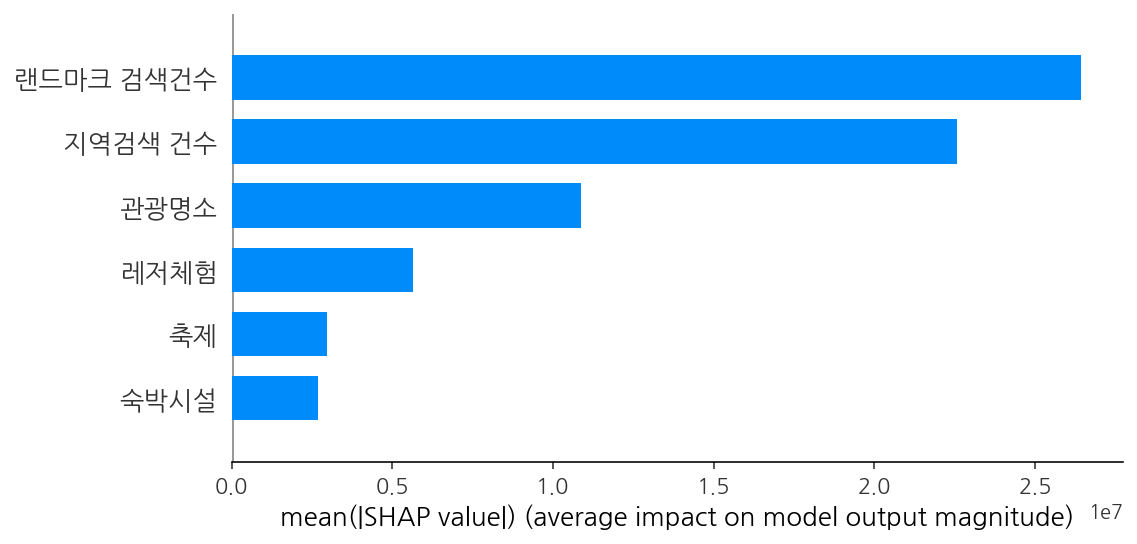

In [2019]:
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train,plot_type="bar")

- 위의 그래프 순으로 타겟특성에 영향을 줌을 확인할 수 있었습니다.

###순열중요도

In [2048]:
import eli5
from eli5.sklearn import PermutationImportance


permuter = PermutationImportance(
    model,
    scoring='r2',
    n_iter=6, # 다른 random seed를 사용하여 6번 반복
    random_state=2
)
permuter.fit(X_test, y_test);

pd.options.display.float_format = '{:.4f}'.format
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

랜드마크 검색건수    0.5054
축제           0.0147
관광명소         0.0000
지역검색 건수      0.0000
숙박시설        -0.0106
레저체험        -0.0197
dtype: float64

- 랜드마크 검색건수가 타겟특성에 가장많은 영향을 미침을 확인할 수 있었습니다.



---


#3.결론


---




> 모델의 성능이 그렇게 좋진 않았지만, 처음 세운 가설을 만족시키는 결과를 확인할 수 있었음.


> 여행객의 수를 예측하는 데 가장 영향을 미친 특성은 각 '지역별 랜드마크 검색건수'였고, 이는 지역의 랜드마크가 여행의 목적지를 정하는데 중요한 역할을 함을 추측할 수 있음.


>  이를 토대로 각 지역은 여행객들을 끌어모으기 위해 그 지역을 대표할 수 있는 랜드마크를 개선해나가는 방향이 유의미한 노력일 것이라는 결과를 도출







#다른 회귀 모델

## 선형회귀

###모델학습

In [2049]:
#선형회귀
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
#표준화
from sklearn.preprocessing import StandardScaler

pipe = make_pipeline( 
    LinearRegression()
)

pipe.fit(X_train, y_train)
print("훈련세트 점수: {:.2f}".format(pipe.score(X_train, y_train)))#r2 score
print("테스트세트 점수: {:.9f}".format(pipe.score(X_test, y_test)))#r2 score

훈련세트 점수: 0.67
테스트세트 점수: 0.380336853


In [2050]:
y_pred = pipe.predict(X_train)
mse = mean_squared_error(y_train, y_pred)

In [2051]:
y_pred_a = pipe.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_a)
mse = mean_squared_error(y_test, y_pred_a)
print(f'mae: {mae:.5f}')
print(f'mse: {mse:.5f}')

mae: 12776446.85306
mse: 427079526698292.31250


In [2052]:
# 회귀계수
coefficients = pipe.named_steps['linearregression'].coef_
pd.DataFrame(coefficients, df_m.columns).sort_values(by=[0],ascending=False)

,0
축제,384344.5071
숙박시설,35987.7786
랜드마크 검색건수,51.1155
지역검색 건수,7.6787
관광명소,-63936.7573
레저체험,-150975.3209


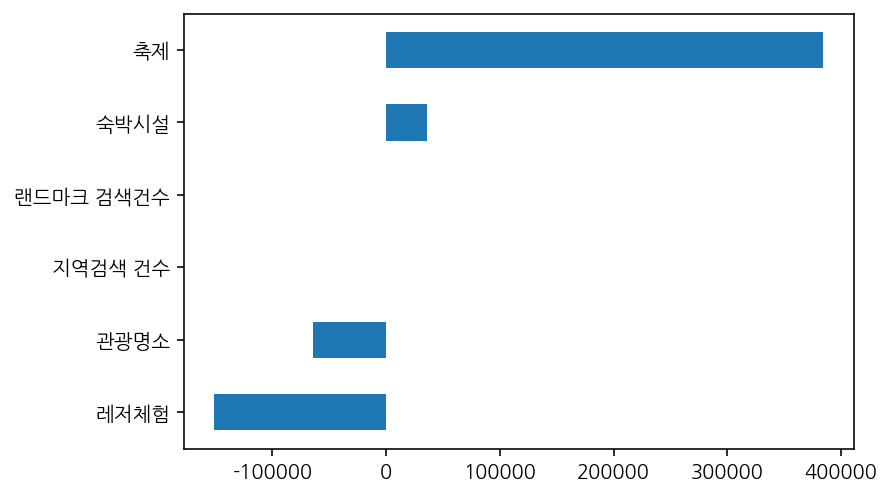

In [2053]:
coefficients2 = pd.Series(pipe.named_steps['linearregression'].coef_, X_test.columns)
coefficients2.sort_values().plot.barh();

###순열중요도

In [2054]:
import eli5
from eli5.sklearn import PermutationImportance


permuter = PermutationImportance(
    pipe.named_steps['linearregression'], # model
    scoring='r2', # metric
    n_iter=6, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)
permuter.fit(X_test, y_test);

In [2055]:
feature_names = X_test.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

랜드마크 검색건수   0.2834
지역검색 건수     0.2473
관광명소        0.1080
숙박시설        0.0754
레저체험        0.0213
축제          0.0002
dtype: float64

In [2056]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.2834 ± 0.1043,랜드마크 검색건수
0.2473 ± 0.3438,지역검색 건수
0.1080 ± 0.1238,관광명소
0.0754 ± 0.1008,숙박시설
0.0213 ± 0.0868,레저체험
0.0002 ± 0.0091,축제


### p-value

In [2057]:
X = np.append(np.ones((len(X_train),1)), X_train, axis=1)
print(X)

[[1.000000e+00 3.000000e+01 0.000000e+00 ... 1.700000e+02 1.278090e+05
  0.000000e+00]
 [1.000000e+00 2.170000e+02 1.000000e+01 ... 1.010000e+02 7.669330e+05
  6.981500e+04]
 [1.000000e+00 9.500000e+01 1.900000e+01 ... 1.300000e+02 2.225963e+06
  4.617200e+04]
 ...
 [1.000000e+00 7.900000e+01 3.000000e+00 ... 3.400000e+01 1.260866e+06
  8.062500e+04]
 [1.000000e+00 1.210000e+02 5.000000e+00 ... 1.320000e+02 2.956780e+05
  0.000000e+00]
 [1.000000e+00 2.320000e+02 1.000000e+00 ... 5.400000e+01 8.610710e+05
  1.127450e+05]]


In [2058]:
#표준오차
var = mse*((np.linalg.inv(np.dot(X.T,X))).diagonal())
se = np.sqrt(var)
se

array([3.26278051e+06, 2.09111092e+04, 4.61265326e+04, 5.75948493e+05,
       1.44930135e+04, 1.93812848e+00, 7.67649532e+00])

In [2059]:
#t-value

coef = pipe.named_steps['linearregression'].coef_
intercept = pipe.named_steps['linearregression'].intercept_
col = np.append(intercept,coef)

t_value = col / se
t_value

array([ 6.57330176,  1.72098851, -3.27306894,  0.66732444, -4.41155714,
        3.96193492,  6.65870127])

In [2060]:
#p-vlalue
from scipy import stats
p_values =[2*(1-stats.t.cdf(np.abs(i),(len(X)-len(X[0])))) for i in t_value]

p_values

[4.480456006206168e-10,
 0.08685545162863462,
 0.0012605874380369197,
 0.5053620130982939,
 1.7040930676337496e-05,
 0.00010456498772781764,
 2.7987723250078034e-10]

In [2061]:
df_x = pd.DataFrame()
df_x["Coefficients"],df_x["Standard Errors"],df_x["t values"],df_x["p values"] = [col,se,t_value,p_values]
df_x.drop(index = 0,inplace=True)
df_x.set_index(df_m.columns,inplace=True)

df_x

,Coefficients,Standard Errors,t values,p values
숙박시설,35987.7786,20911.1092,1.7210,0.0869
레저체험,-150975.3209,46126.5326,-3.2731,0.0013
축제,384344.5071,575948.4935,0.6673,0.5054
관광명소,-63936.7573,14493.0135,-4.4116,0.0000
지역검색 건수,7.6787,1.9381,3.9619,0.0001
랜드마크 검색건수,51.1155,7.6765,6.6587,0.0000


In [2062]:
#ols 회귀분석
import statsmodels.api as sm

X_train2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X_train2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  여행객 수   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     65.89
Date:                Wed, 27 Jul 2022   Prob (F-statistic):           4.26e-44
Time:                        07:35:08   Log-Likelihood:                -3606.0
No. Observations:                 200   AIC:                             7226.
Df Residuals:                     193   BIC:                             7249.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.145e+07   2.63e+06      8.151      0.0

In [2063]:
print(results.params) # 회귀 계수

숙박시설         100089.1894
레저체험        -262682.7624
축제           719054.9068
관광명소          -9270.0265
지역검색 건수          11.0940
랜드마크 검색건수        51.1871
dtype: float64


##statsmodel OLS 

In [2064]:

import statsmodels.api as sm
linear = sm.OLS(y_train, X_train)
results = linear.fit()

In [2065]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  여행객 수   R-squared (uncentered):                   0.799
Model:                            OLS   Adj. R-squared (uncentered):              0.793
Method:                 Least Squares   F-statistic:                              128.3
Date:                Wed, 27 Jul 2022   Prob (F-statistic):                    9.04e-65
Time:                        07:35:08   Log-Likelihood:                         -3635.6
No. Observations:                 200   AIC:                                      7283.
Df Residuals:                     194   BIC:                                      7303.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [2066]:
print(results.params)

숙박시설         100089.1894
레저체험        -262682.7624
축제           719054.9068
관광명소          -9270.0265
지역검색 건수          11.0940
랜드마크 검색건수        51.1871
dtype: float64


In [2068]:
pred = results.predict(X_test)

In [2069]:
r2_score(y_test,pred)

0.13725672843422276

## 릿지회귀

In [2070]:
#릿지 회귀
from sklearn.linear_model import RidgeCV

alphas = [0.001, 0.002, 0.0025, 0.003, 0.0035]

ridge=RidgeCV(alphas=alphas, normalize=True, cv=5)
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([0.001 , 0.002 , 0.0025, 0.003 , 0.0035]), cv=5,
        normalize=True)

In [2071]:
print("alpha: ", ridge.alpha_)
print("best score: ", ridge.best_score_)

alpha:  0.0035
best score:  0.5673038606934206


In [2072]:
from sklearn.linear_model import Ridge

ridgeReg = Ridge(alpha=0.0025,normalize=True)
ridge =ridgeReg.fit(X_train,y_train)
y_pred4 = ridgeReg.predict(X_test)

In [2073]:
mae4 = mean_absolute_error(y_test, y_pred4)
print(f'테스트 에러: {mae4:.2f}')

테스트 에러: 12775082.02


In [2074]:
r2_score(y_test, y_pred4)

0.3807457723656895

## xgboost 회귀

In [2075]:
#xgboost

from xgboost import XGBRegressor

boosting = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.2,
    n_jobs=-1
)

boosting.fit(X_train, y_train)


[07:36:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.2, n_estimators=1000, n_jobs=-1)

In [2076]:
y_pred_b = boosting.predict(X_test)
print('R^2', r2_score(y_test, y_pred_b))

R^2 0.4303231380129373


In [2077]:
mae3 = mean_absolute_error(y_test, y_pred_b)
print(f'테스트 에러: {mae3:.2f}')

테스트 에러: 12022165.87


In [2078]:
explainer = shap.TreeExplainer(boosting)
shap_values = explainer.shap_values(X_test)

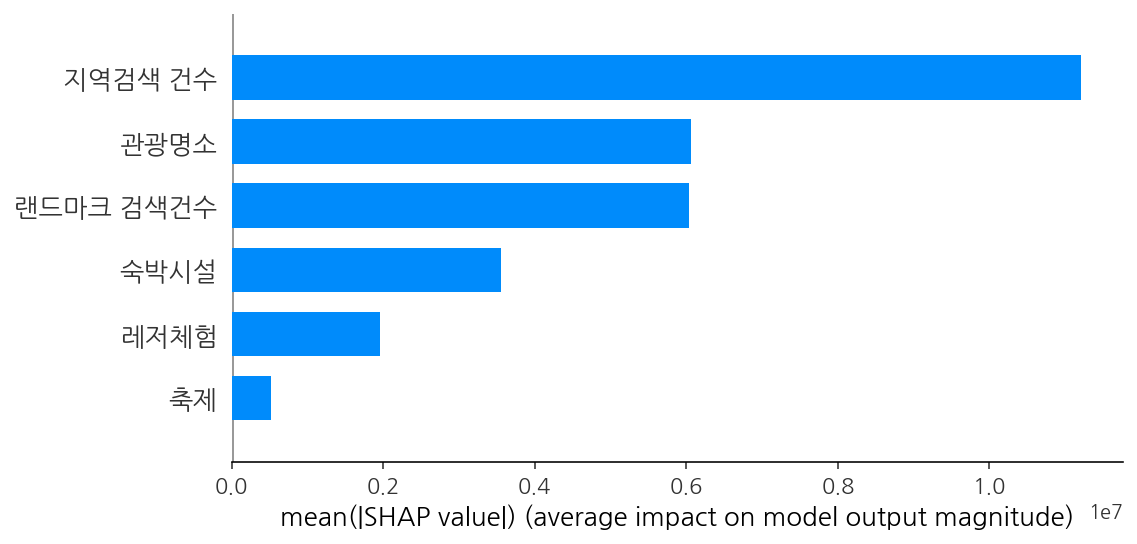

In [2079]:
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train,plot_type="bar")

In [2080]:
#마지막에 예측 결과 히트맵으로 비교해보자(#히트맵 지도 파일(지역별 방문객 수))